In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

from tqdm import tqdm

from networks.cnn import CNN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


In [2]:
transform = transforms.Compose([transforms.ToTensor()])
# Download CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

#create smaller dataset to test with
mini_train_idx = torch.utils.data.SubsetRandomSampler(np.arange(200)) # get the first 200 images
mini_train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, sampler=mini_train_idx) 

Files already downloaded and verified


In [3]:
# Create the model
model = CNN().to(device)
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 10

In [4]:
# Train the model
progress = tqdm(total=len(train_loader)*EPOCHS, desc="Training") # add a progress bar
for epoch in range(EPOCHS):
    for images, labels in train_loader:
        model.train()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        progress.update(1)
    
    progress.write(f'Epoch [{epoch+1}/{10}], Loss: {loss.item():.4f}')

# #saving model
# torch.save(model.state_dict(), "pretrained_cnn.pth")
# print("Saved PyTorch Model State to pretrained_cnn.pth")

Training:  10%|█         | 785/7820 [00:30<04:17, 27.30it/s]

Epoch [1/10], Loss: 1.4493


Training:  20%|██        | 1569/7820 [01:01<03:41, 28.18it/s]

Epoch [2/10], Loss: 0.9039


Training:  30%|███       | 2349/7820 [01:31<03:56, 23.16it/s]

Epoch [3/10], Loss: 0.8591


Training:  40%|████      | 3133/7820 [02:01<02:52, 27.09it/s]

Epoch [4/10], Loss: 1.1446


Training:  50%|█████     | 3913/7820 [02:31<02:32, 25.66it/s]

Epoch [5/10], Loss: 0.9419


Training:  60%|██████    | 4697/7820 [03:02<01:54, 27.21it/s]

Epoch [6/10], Loss: 0.4461


Training:  70%|███████   | 5478/7820 [03:32<01:33, 25.10it/s]

Epoch [7/10], Loss: 0.4300


Training:  80%|████████  | 6259/7820 [04:04<00:58, 26.88it/s]

Epoch [8/10], Loss: 0.6056


Training:  90%|█████████ | 7043/7820 [04:34<00:28, 26.98it/s]

Epoch [9/10], Loss: 0.7641


Training: 100%|██████████| 7820/7820 [05:04<00:00, 26.26it/s]

Epoch [10/10], Loss: 1.1034


Training: 100%|██████████| 7820/7820 [05:20<00:00, 26.26it/s]

In [9]:
#training a model with batchsize=1 to fix dimension errors in the transform of fgsm
transform = transforms.Compose([transforms.ToTensor()])
train_dataset_bs1 = datasets.CIFAR10(root='./data', train=True, transform=transform)
train_loader_bs1 = torch.utils.data.DataLoader(dataset=train_dataset_bs1, batch_size=1, shuffle=True)
model_batchsize1 = CNN().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_batchsize1.parameters(), lr=0.001)
EPOCHS = 10
# Train the model
progress = tqdm(total=len(train_loader_bs1)*EPOCHS, desc="Training") # add a progress bar
for epoch in range(EPOCHS):
    for images, labels in train_loader_bs1:
        model_batchsize1.train()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_batchsize1(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        progress.update(1)
    
    progress.write(f'Epoch [{epoch+1}/{10}], Loss: {loss.item():.4f}')

# #saving model
torch.save(model.state_dict(), "./models/cnn_batchsize1.pth")
print("Saved PyTorch Model State as cnn_batchsize1.pth")

Training:  10%|█         | 50062/500000 [02:03<19:01, 394.13it/s]

Epoch [1/10], Loss: 0.8192


Training:  20%|██        | 100052/500000 [04:04<15:43, 423.95it/s]

Epoch [2/10], Loss: 1.1723


Training:  30%|███       | 150061/500000 [06:01<13:33, 430.08it/s]

Epoch [3/10], Loss: 3.0972


Training:  40%|████      | 200052/500000 [07:57<11:44, 426.03it/s]

Epoch [4/10], Loss: 0.1617


Training:  50%|█████     | 250060/500000 [09:53<09:45, 427.09it/s]

Epoch [5/10], Loss: 2.5820


Training:  60%|██████    | 300047/500000 [11:49<07:48, 426.62it/s]

Epoch [6/10], Loss: 0.1338


Training:  70%|███████   | 350072/500000 [13:45<05:48, 430.43it/s]

Epoch [7/10], Loss: 0.1622


Training:  80%|████████  | 400065/500000 [15:42<04:00, 415.97it/s]

Epoch [8/10], Loss: 0.0330


Training:  90%|█████████ | 450078/500000 [17:38<01:55, 431.14it/s]

Epoch [9/10], Loss: 1.1206


Training: 100%|██████████| 500000/500000 [19:34<00:00, 434.17it/s]

Epoch [10/10], Loss: 2.3504
Saved PyTorch Model State as cnn_batchsize1.pth


Training: 100%|██████████| 500000/500000 [19:50<00:00, 434.17it/s]

In [4]:
#testing
# model = CNN()
# model.load_state_dict(torch.load("models/cnn.pth"))

# model.to(device)
# model.eval()

transform = transforms.Compose([transforms.ToTensor()])
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

criterion = torch.nn.CrossEntropyLoss()

losses = []
accuracies = []

with torch.no_grad():
    for inputs, labels in test_loader:
        #for every batch
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        accuracy = (torch.max(outputs, dim=1)[1] == labels).to(torch.float32).mean()
        losses.append(loss.cpu().numpy())
        accuracies.append(accuracy.cpu().numpy())

loss, accuracy = np.mean(losses), np.mean(accuracies)

print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 4.2848, Accuracy: 0.0168


In [5]:
# Fast gradient sign method
def fgsm(image, epsilon, data_grad):
    # eta = epsilon * sign(gradient of loss w.r.t input image)
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon*sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

In [6]:
# Adversarial test (but technically also train)

epsilons = [0, 0.0005, 0.001, 0.003, 0.007,0.01]
pretrained_model = "models/cnn.pth"
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the network
model = CNN().to(device)
model.load_state_dict(torch.load(pretrained_model))
# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def test( model, device, test_loader, epsilon,criterion, optimizer ):
    correct = 0
    adv_examples = []
    for images, labels in test_loader:
        # Send the data and label to the device
        images, labels = images.to(device), labels.to(device)

        # Set requires_grad attribute of tensor
        images.requires_grad = True

        # Forward pass the data through the model
        output = model(images) 
        init_pred = torch.max(output, dim=1)[1] # get the index of the max log-probability
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Collect gradients
        data_grad = images.grad.data

        # Call FGSM Attack
        perturbed_images = fgsm(images, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_images)

        final_pred = torch.max(output, dim=1)[1] # get the index of the max log-probability
        correct_idx = (final_pred == labels)
        correct += sum(correct_idx.to(torch.float32)).item()

        # only get pred that was right buut now wrong
        incorrect_idx = (final_pred != labels) & (init_pred == labels)

        #saving examples of perturbed images for later visualization
        if len(adv_examples) < 5:
            # Save some adv examples for visualization later
            # p is the single perturbed image, y is the correct label, initial and final and pre- and post-fgsm predictions
            for initial, final, p, y in zip(init_pred[incorrect_idx], final_pred[incorrect_idx], perturbed_images[incorrect_idx], labels[incorrect_idx]):
                adv_ex = p.squeeze().detach().cpu().numpy()
                adv_examples.append( (initial.item(), final.item(), y.item(), adv_ex) )
                # returned adv_examples is 1 x batchsize x 4, holding items: pre-fgsm pred, post-fgsm pred, ground truth, post-fgsm image
            
            # Special case for saving 0 epsilon examples
            if epsilon == 0:
                for initial, final in zip(init_pred[correct_idx], final_pred[correct_idx]):
                    adv_ex = perturbed_images.squeeze().detach().cpu().numpy()
                    adv_examples.append( (initial.item(), final.item(), final.item(), adv_ex) )


    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_dataset))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_dataset), final_acc))
    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

accuracies = []
examples = []

epsilons = [0, 0.001, 0.003, 0.005, 0.007, 0.1, 0.15] #overwriting epsilon for faster testing
# Run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps, criterion, optimizer)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 7322.0 / 10000 = 0.7322
Epsilon: 0.001	Test Accuracy = 7123.0 / 10000 = 0.7123
Epsilon: 0.003	Test Accuracy = 5221.0 / 10000 = 0.5221
Epsilon: 0.005	Test Accuracy = 3132.0 / 10000 = 0.3132
Epsilon: 0.007	Test Accuracy = 1720.0 / 10000 = 0.172
Epsilon: 0.1	Test Accuracy = 0.0 / 10000 = 0.0
Epsilon: 0.15	Test Accuracy = 4.0 / 10000 = 0.0004


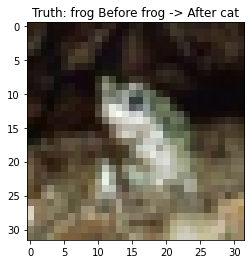

In [64]:
# print an adversarial example saved during the above program
import matplotlib.pyplot as plt
import torchvision

#img needs to be a tensor that is configured with torchvision.utils.make_grid(img), before after and truth are strings
def imshow(img, truth, before="", after=""):
    npimg = torchvision.utils.make_grid(img).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title("Truth: {} Before {} -> After {}".format(truth, before, after))
    plt.show()

ex = examples[1][3]
img = torch.tensor(ex[3])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# perturbed image
imshow(img, classes[ex[2]], classes[ex[0]], classes[ex[1]])

In [108]:
#custom class because we need to add the label to the transform
from PIL import Image
class CustomCIFAR(datasets.CIFAR10):
    def __getitem__(self, index: int):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img)
        if self.transform is not None:
            #CHANGED from the torchvision implementation: pass the target into transform
            img = self.transform((img, target))
            # img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target
    
class FGSMTransform:
    """Perform a fast gradient sign attack on an image."""

    def __init__(self, epsilon=0.005):
        self.epsilon = epsilon
        self.model = CNN().to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        self.model.load_state_dict(torch.load("./models/cnn_batchsize1.pth"))
        self.criterion = torch.nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        
    def __call__(self,sample):
        x, labels = sample
        print(x.size())
        #if we process a single image instead of batch, we need to add a fourth dimension
        if x.dim() == 3:
            x = x.unsqueeze(0)
            print(x.size())
        x = x.to(device)
        x.requires_grad = True

        # forward, backward pass to calculate gradient
        output = model(x)
        loss = self.criterion(output, labels)
        self.optimizer.zero_grad()
        loss.backward()

        # Collect gradients
        data_grad = x.grad.data

        # Call FGSM Attack, same as fgsm()
        sign_data_grad = data_grad.sign()
        perturbed_images = x + self.epsilon * sign_data_grad
        perturbed_images = torch.clamp(perturbed_images, 0, 1)
        return perturbed_images
    
class ToTensor:
    """Convert ndarrays in sample to Tensors, include label"""
    def __call__(self, sample):
        x, label = sample
        return (transforms.functional.to_tensor(x), torch.from_numpy(np.array(label)))

    
transform = transforms.Compose([
        ToTensor(),
        # transforms.Lambda(lambda x: print(x))
        FGSMTransform()
    ])

# mini_set = datasets.CIFAR10(root='./data', train=False, transform=transform)
mini_set = CustomCIFAR(root='./data', train=False, transform=transform)
mini_idx = torch.utils.data.SubsetRandomSampler(np.arange(200)) # get the first 200 images
mini_loader = torch.utils.data.DataLoader(dataset=mini_set, batch_size=64, sampler=mini_idx)
for images, l in mini_loader:
    imshow(torch.tensor(images.squeeze().detach().cpu().numpy()), "test")
    break

# test_img = torch.tensor(p[0].detach().numpy())
# imshow(test_img,"")
# test_transform = transforms.Compose([
#         FGSMTransform()
#     ])
# x_transformed = test_transform(test_img)
# imshow(x_transformed,"")

torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])


ValueError: Expected input batch_size (1) to match target batch_size (0).

torch.Size([64, 3, 32, 32])


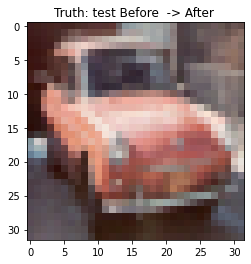

In [188]:
#this is a shorter function that perturbs a single image. I adapted the FGSM class above from this
#note: labels isn't defined in this function (it runs because labels was defined previously)
def fgsm_transform(epsilon, x):
    # eta = epsilon * sign(gradient of loss w.r.t input image)
    # Set requires_grad attribute of tensor
    x = x.to(device)
    x.requires_grad = True

    # forward pass and calculate gradient
    output = model(x) 
    loss = criterion(output, labels)
    optimizer.zero_grad()
    loss.backward()

    # Collect gradients
    data_grad = x.grad.data

    # Call FGSM Attack, same as fgsm()
    sign_data_grad = data_grad.sign()
    perturbed_images = x + epsilon*sign_data_grad
    perturbed_images = torch.clamp(perturbed_images, 0, 1)
    return perturbed_images

sample = None
labels = None
for images, l in mini_train_loader:
    if sample == None:
        sample = images
        labels = l
        break
p = fgsm_transform(0.005, sample)
imshow(torch.tensor(p[0].squeeze().detach().cpu().numpy()), "test")